In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [2]:
import os

In [3]:
os.chdir('C:\\Users\\aravi\Downloads')

# Loading The Dataset

In [4]:
df = pd.read_csv('credit.csv')

# Checking OUT the Basic details

In [5]:
#display the dataset
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [6]:
#dimension of dataset
df.shape

(100000, 28)

In [7]:
#display first 5 rows
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [8]:
#statistical summary of numerical columns
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [9]:
#columns name
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [10]:
#basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [11]:
df.duplicated().sum()

0

no duplicates in dataset

In [12]:
#checking the no of unique values in each columns
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

# EDA

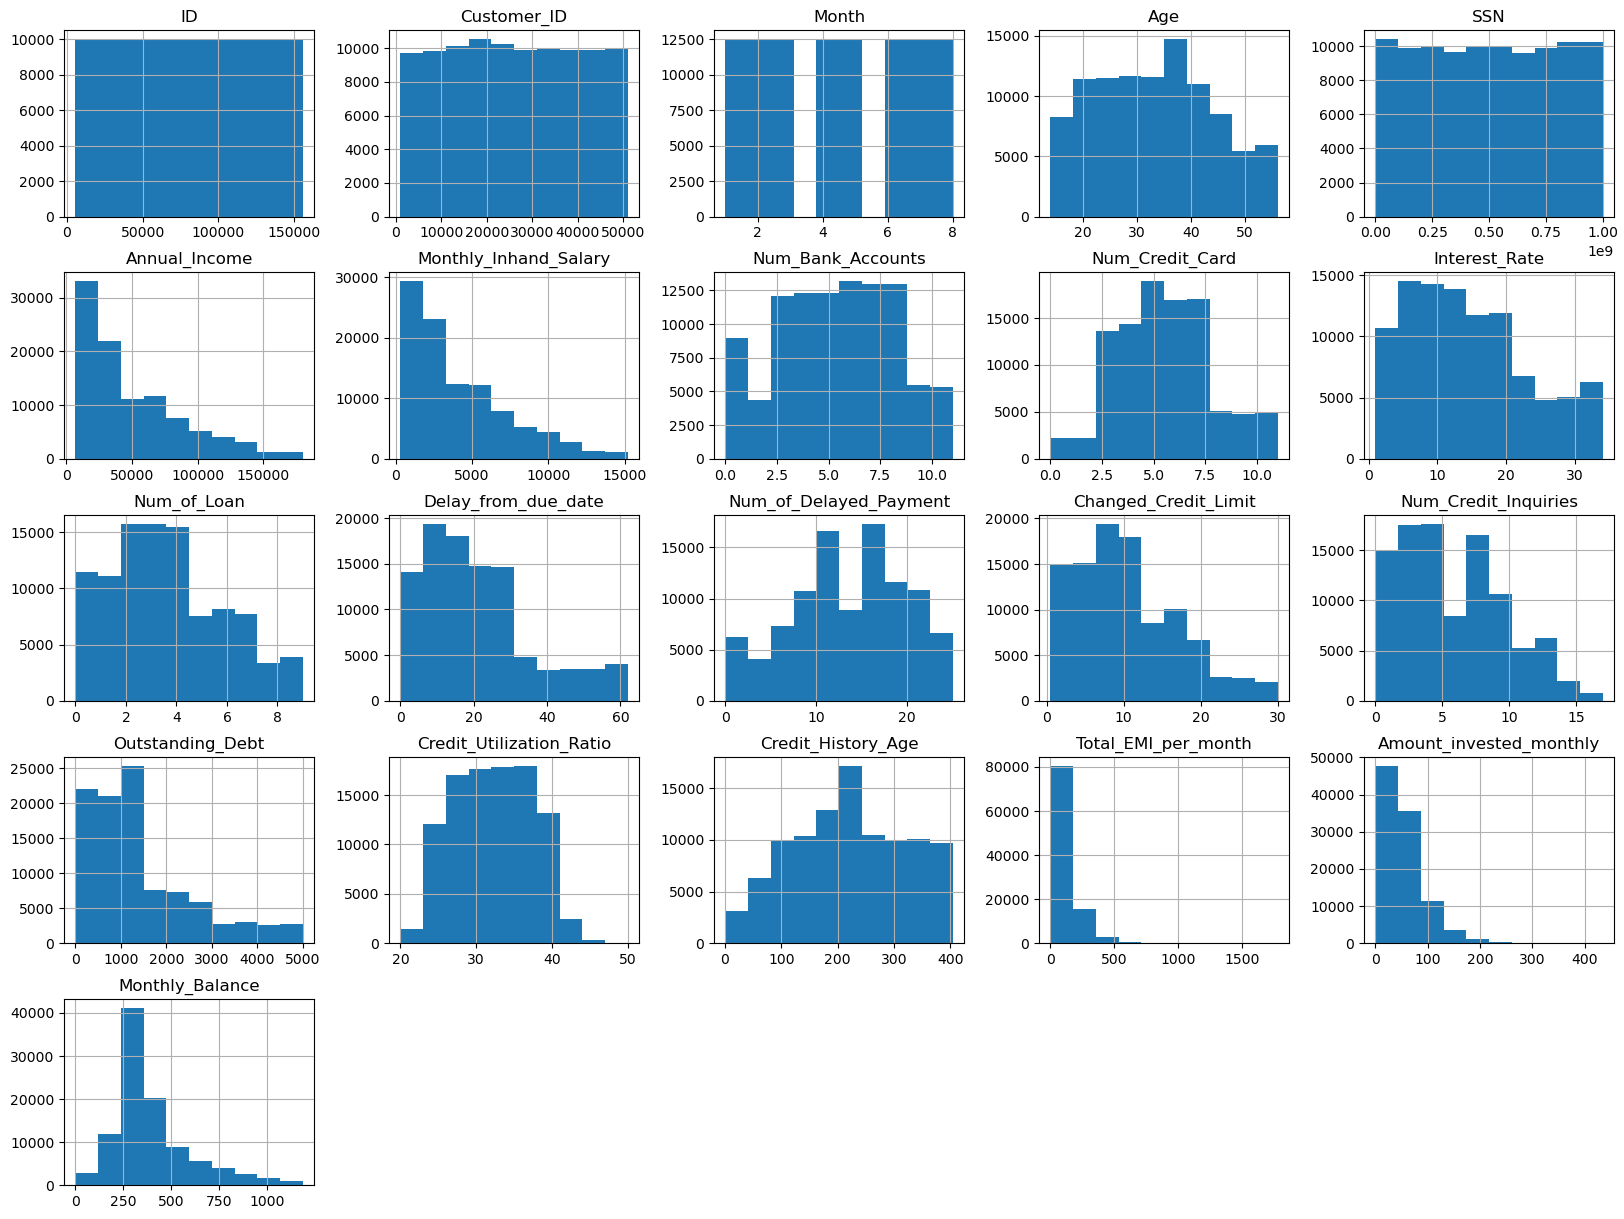

In [13]:
#plotting histogram to see the numerical data distribution
df.hist(figsize =(20,15))
plt.show()

In [14]:
df["Month"].value_counts()

1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: Month, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

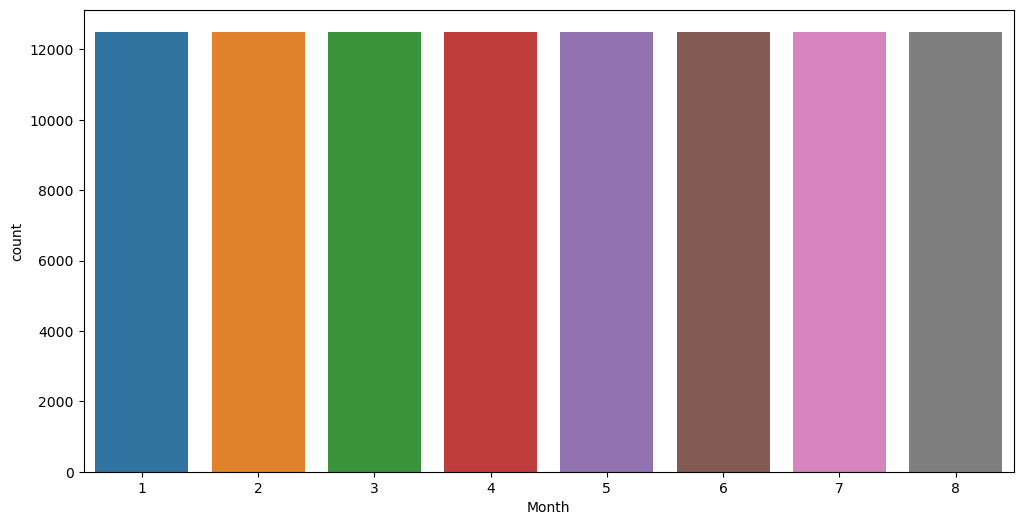

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="Month")

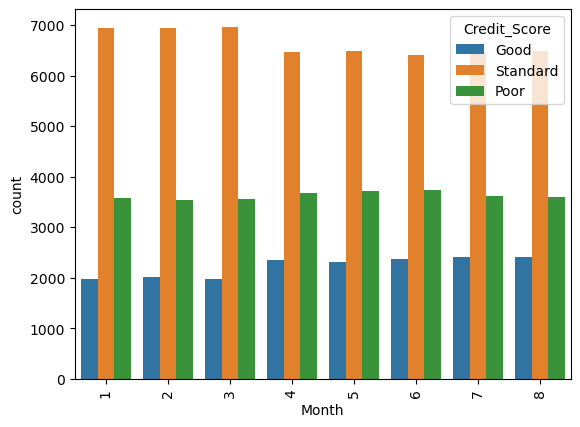

In [16]:
sns.countplot(data=df,x="Month",hue='Credit_Score')
plt.xticks(rotation=90)
plt.show()

from the above graph we can see after 3rd month customers having standard credit score decreases and customers having good credit score increases

In [17]:
df["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

Text(0.5, 1.0, 'distribution of customers by Credit Score')

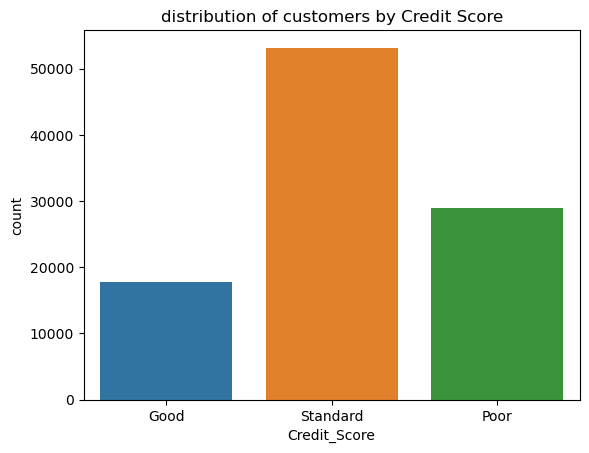

In [18]:
sns.countplot(data=df,x="Credit_Score")
plt.title('distribution of customers by Credit Score')

here most of the customers are given standard credit score which is (53% of people) while the percentage for remaining customers are 
split between good and poor credit score(in that good credit score is only for 18% of customers) 
we can also see the imbalance in the distribution of each class

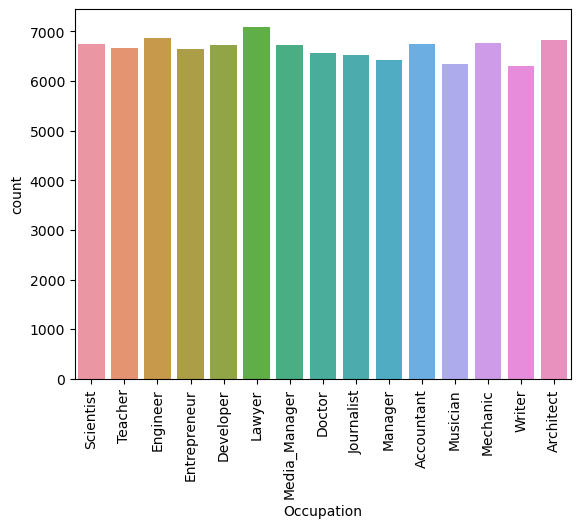

In [19]:
#shows the count of customers by occupation
sns.countplot(data=df,x="Occupation")
plt.xticks(rotation=90)
plt.show()

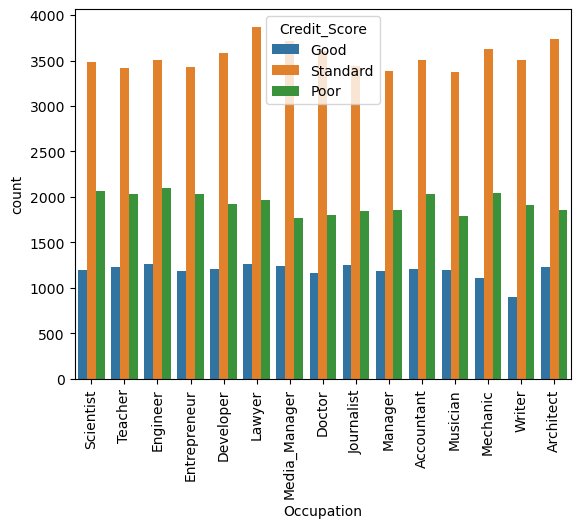

In [20]:
sns.countplot(data=df,x="Occupation",hue='Credit_Score')
plt.xticks(rotation=90)
plt.show()

from the above graph we can see most number of customers having any occupation gets standard credit score.
but customers having writer as occupation have less probability of getting good credit score.

# Payment behaviour

In [21]:
df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

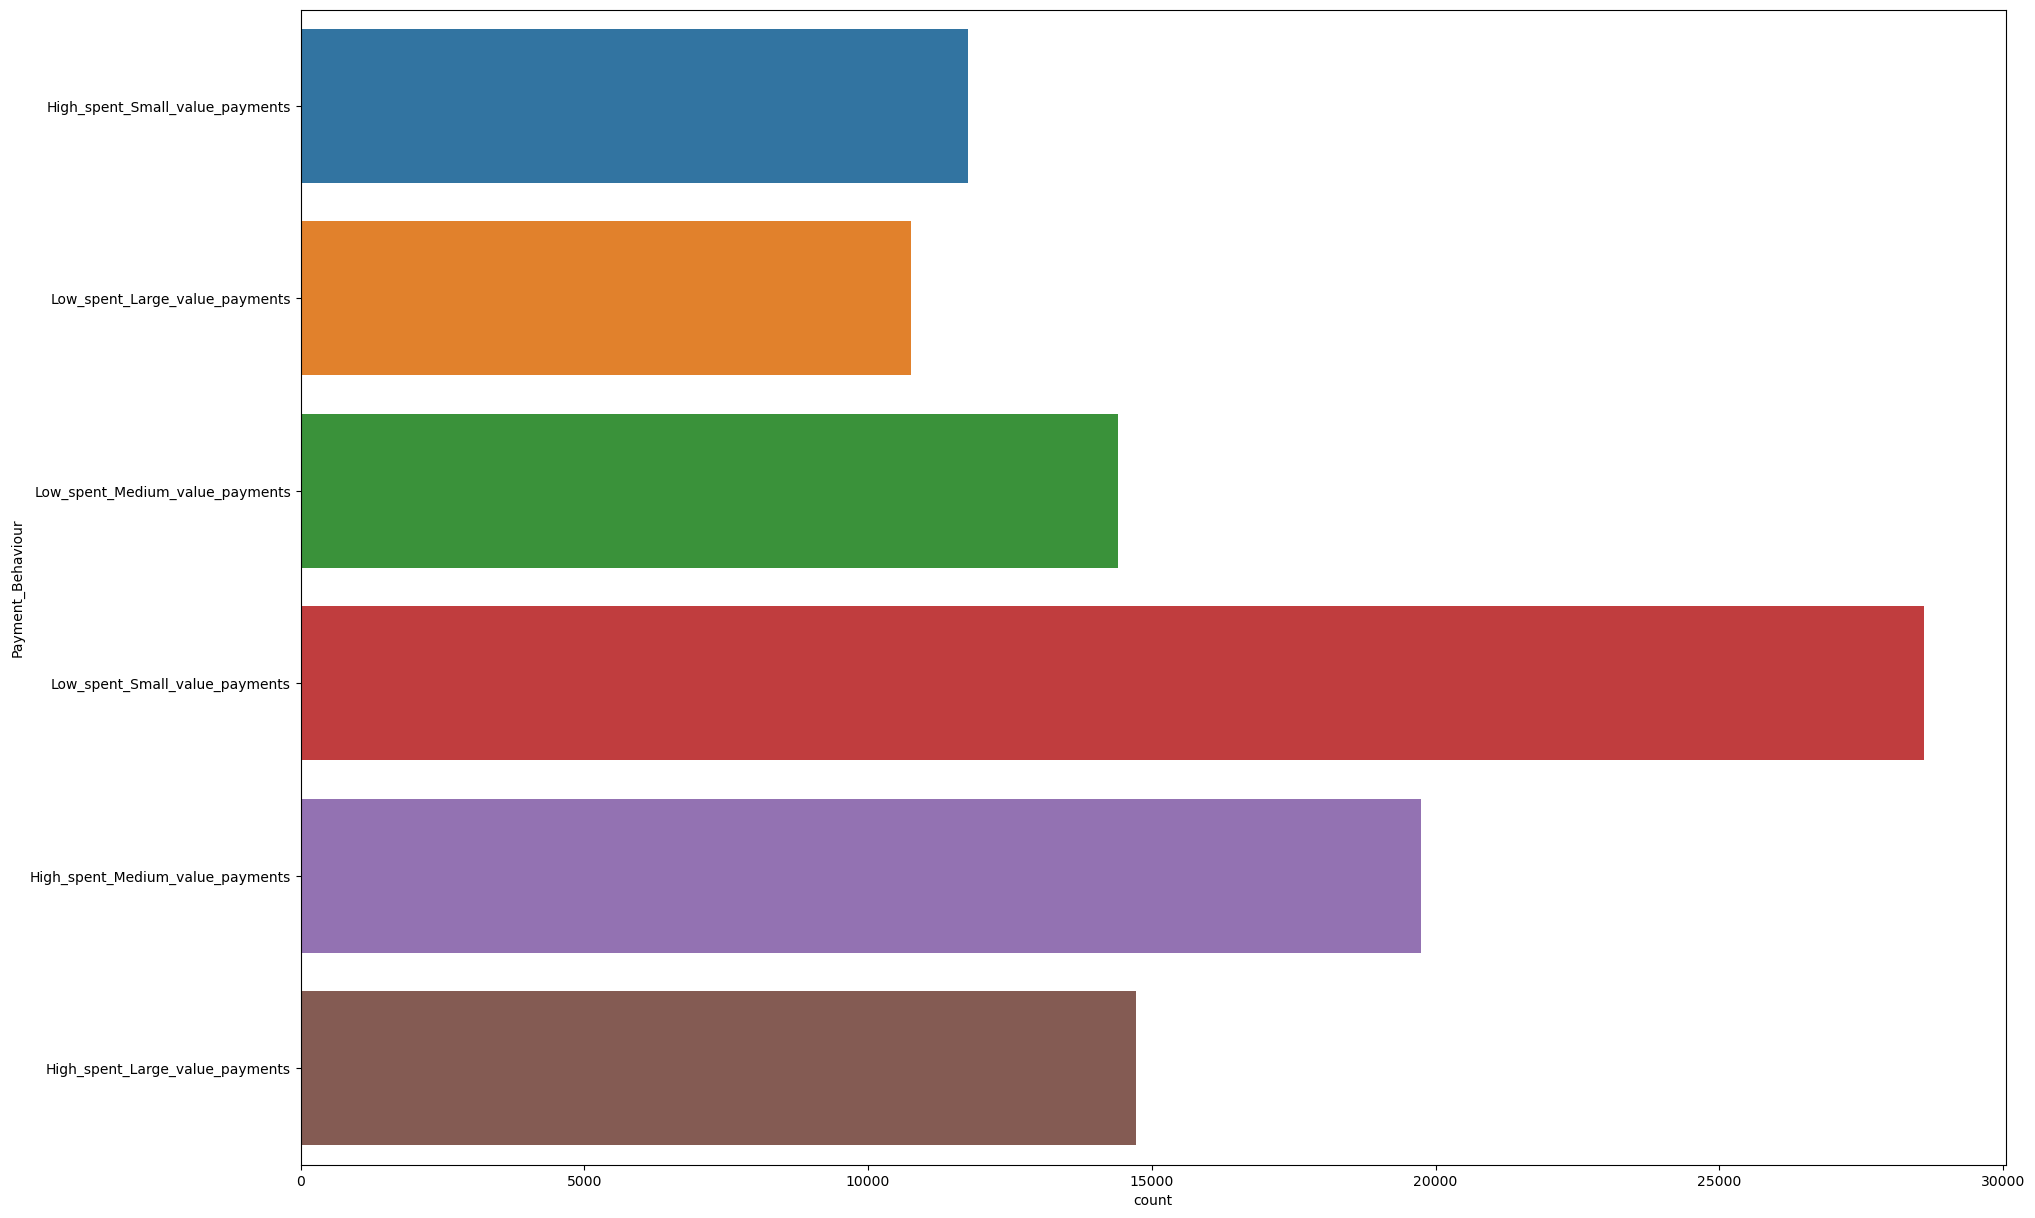

In [22]:
fig = plt.figure(figsize= (22,15))
sns.countplot(data=df,y="Payment_Behaviour")

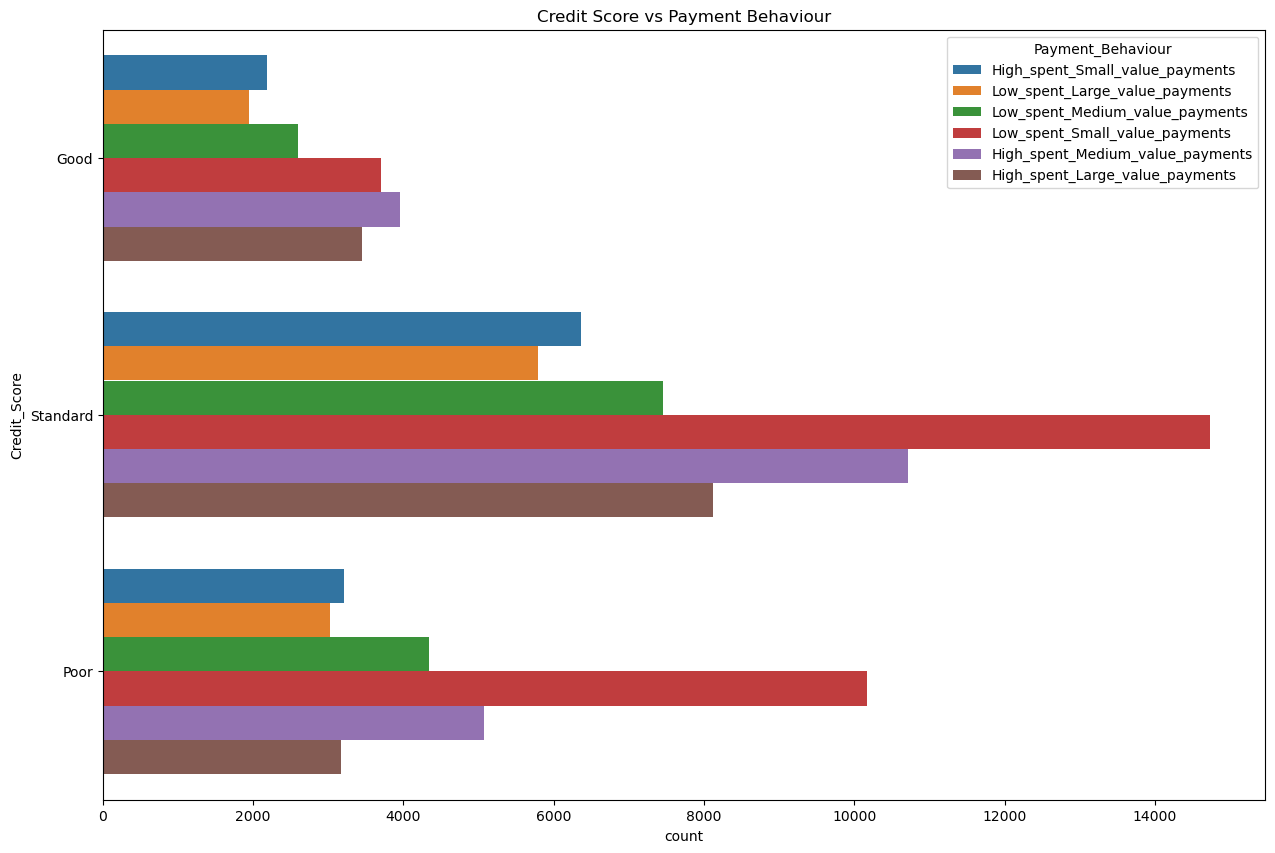

In [23]:
fig = plt.figure(figsize= (15,10))
sns.countplot(data=df,y="Credit_Score",hue="Payment_Behaviour")
plt.title('Credit Score vs Payment Behaviour')
plt.show()

the above graph shows that the large number of people having Standard and poor credit score usually gets Low_spent_Small_value_payments

# Feature engineering the payment_behaviour col into two new cols (spending level,payment value)

In [24]:
df['Spending_level'] = df['Payment_Behaviour'].str.split('_').str[0]

#mapping their values to high and low
df['Spending_level'] = df['Spending_level'].map({'High': 'High', 'Low': 'Low'})


In [25]:
df['Payment_value'] = df['Payment_Behaviour'].str.split('_').str[2]

#mapping their values to high and low
df['Payment_value'] = df['Payment_value'].map({'Small': 'Low', 'Large': 'High','Medium':'Medium'})

del df['Payment_Behaviour']

# Pre Processing


In [26]:
#checking for null values
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Spending_level              0
Payment_value               0
dtype: int64

In [27]:
#checking for outliers

In [28]:
num_col = ['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

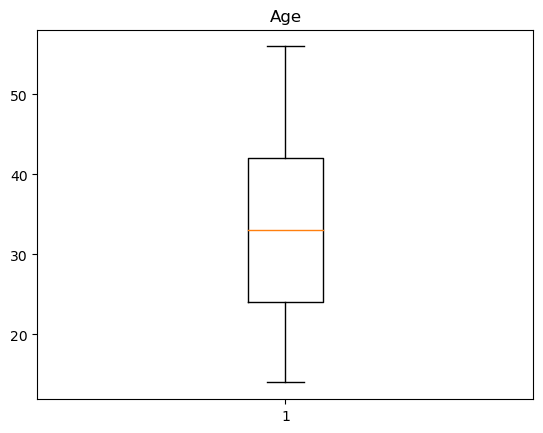

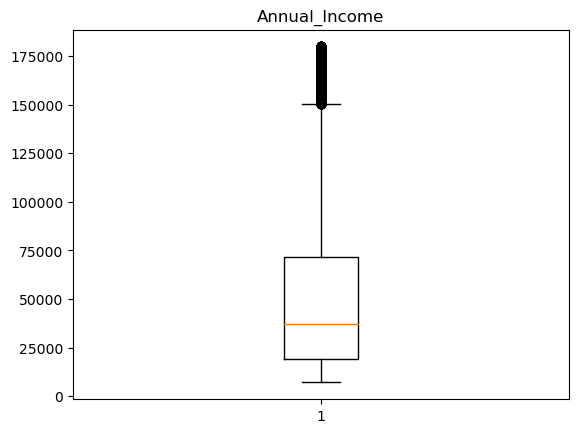

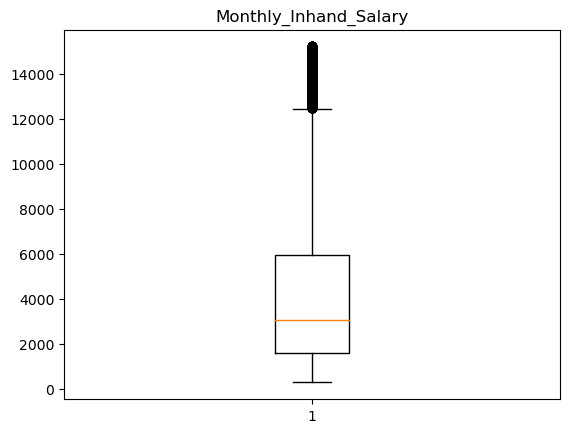

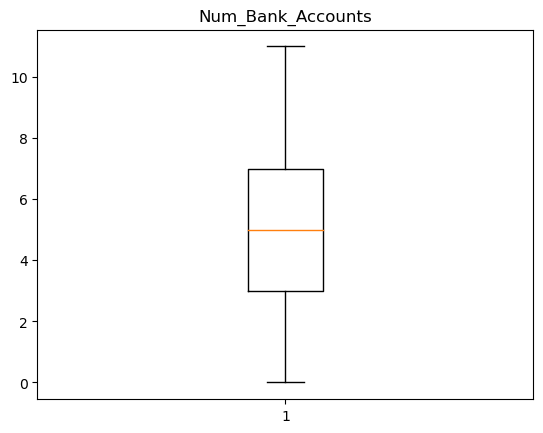

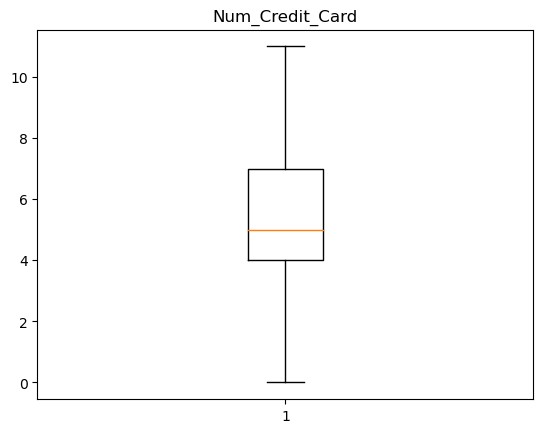

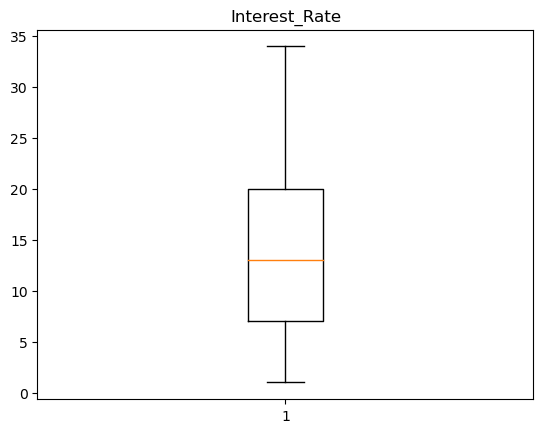

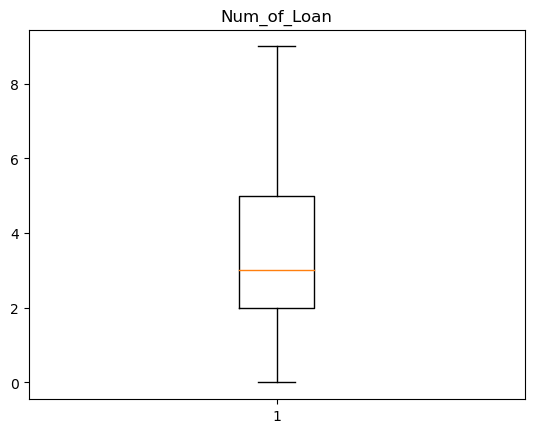

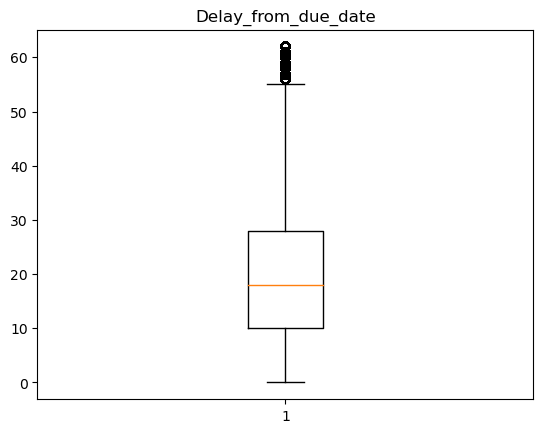

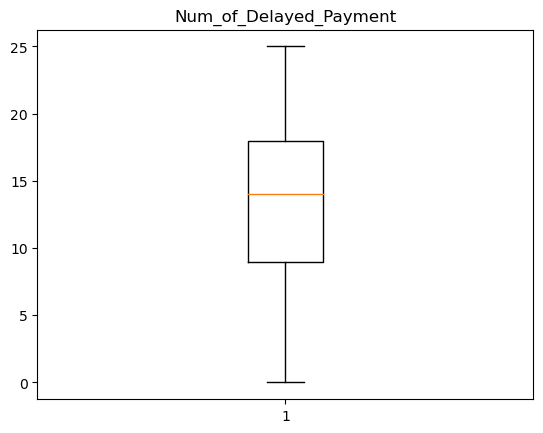

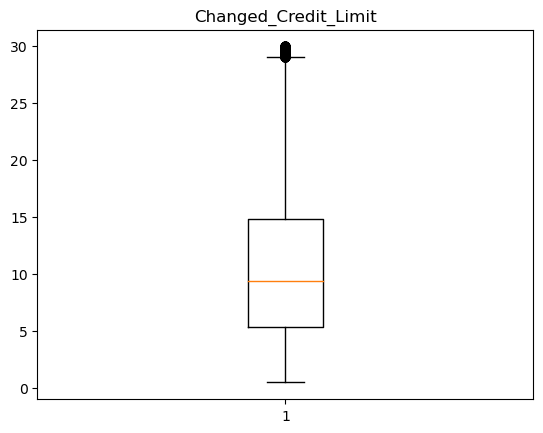

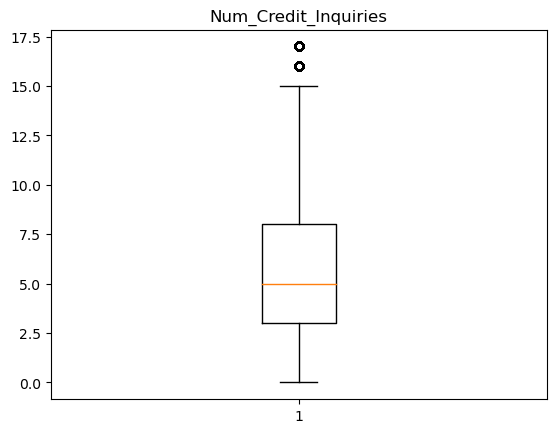

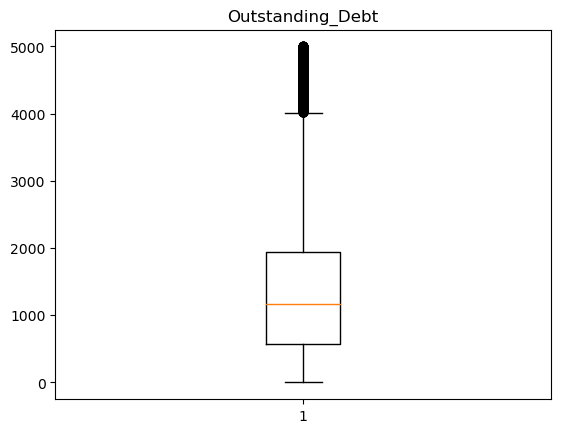

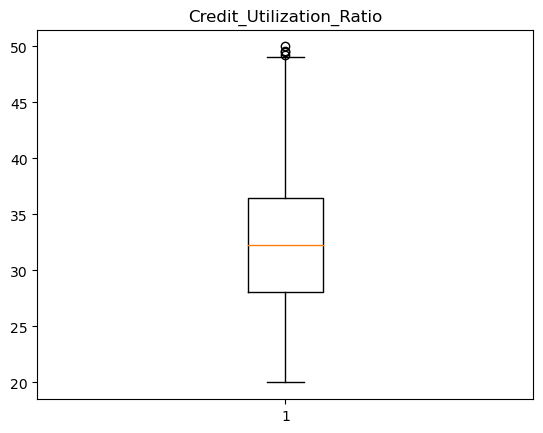

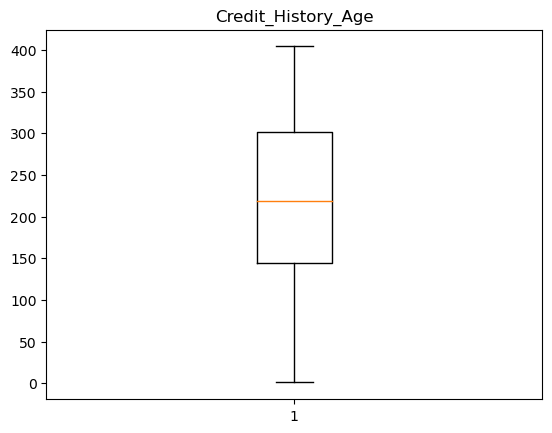

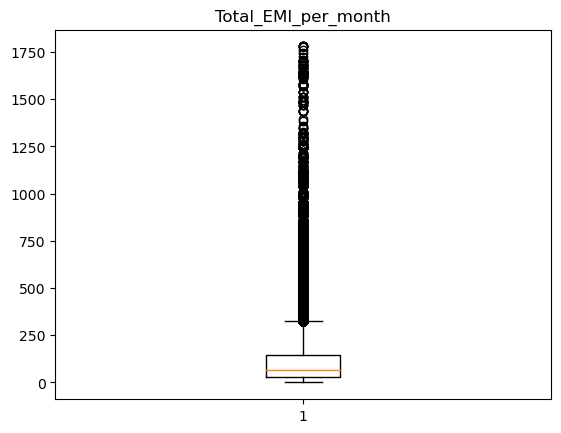

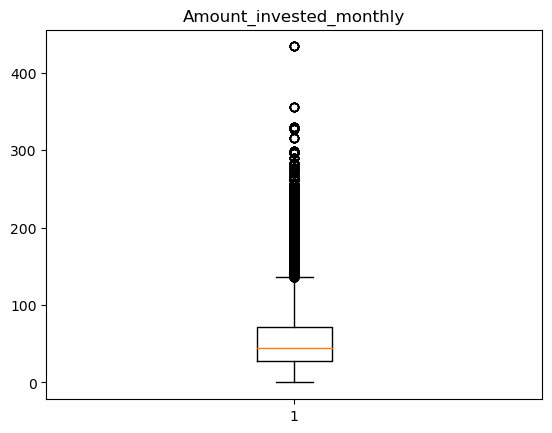

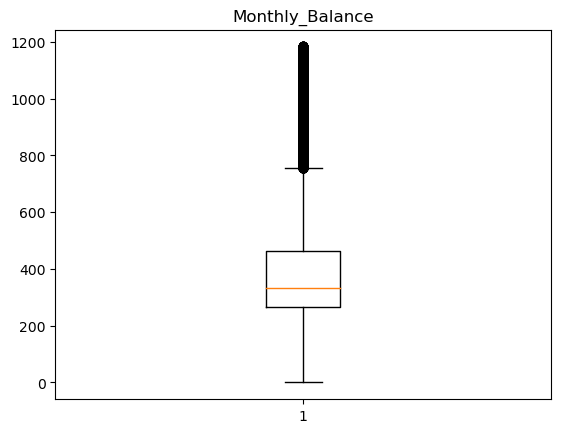

In [29]:
for i in num_col:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [30]:
print('skewness value of Monthly_Balance: ',df['Monthly_Balance'].skew())
print('skewness value of Amount_invested_monthly: ',df['Amount_invested_monthly'].skew())
print('skewness value of Total_EMI_per_month: ',df['Total_EMI_per_month'].skew())
print('skewness value of Credit_Utilization_Ratio: ',df['Credit_Utilization_Ratio'].skew())
print('skewness value of Outstanding_Debt: ',df['Outstanding_Debt'].skew())
print('skewness value of Num_Credit_Inquiries: ',df['Num_Credit_Inquiries'].skew())
print('skewness value of Changed_Credit_Limit: ',df['Changed_Credit_Limit'].skew())
print('skewness value of Delay_from_due_date: ',df['Delay_from_due_date'].skew())
print('skewness value of Monthly_Inhand_Salary: ',df['Monthly_Inhand_Salary'].skew())
print('skewness value of Annual_Income: ',df['Annual_Income'].skew())

skewness value of Monthly_Balance:  1.3556137797479813
skewness value of Amount_invested_monthly:  1.7610362306626115
skewness value of Total_EMI_per_month:  4.041492244076896
skewness value of Credit_Utilization_Ratio:  0.02861652613497035
skewness value of Outstanding_Debt:  1.2075361955699684
skewness value of Num_Credit_Inquiries:  0.40682536214725384
skewness value of Changed_Credit_Limit:  0.7083424268261724
skewness value of Delay_from_due_date:  0.9698402706723249
skewness value of Monthly_Inhand_Salary:  1.1286896104040092
skewness value of Annual_Income:  1.130222566741384


since the skewness value of these columns are close to 1/-1 , they have almost to normal distribution & these outliers 
are naturally formed, so no need to remove it

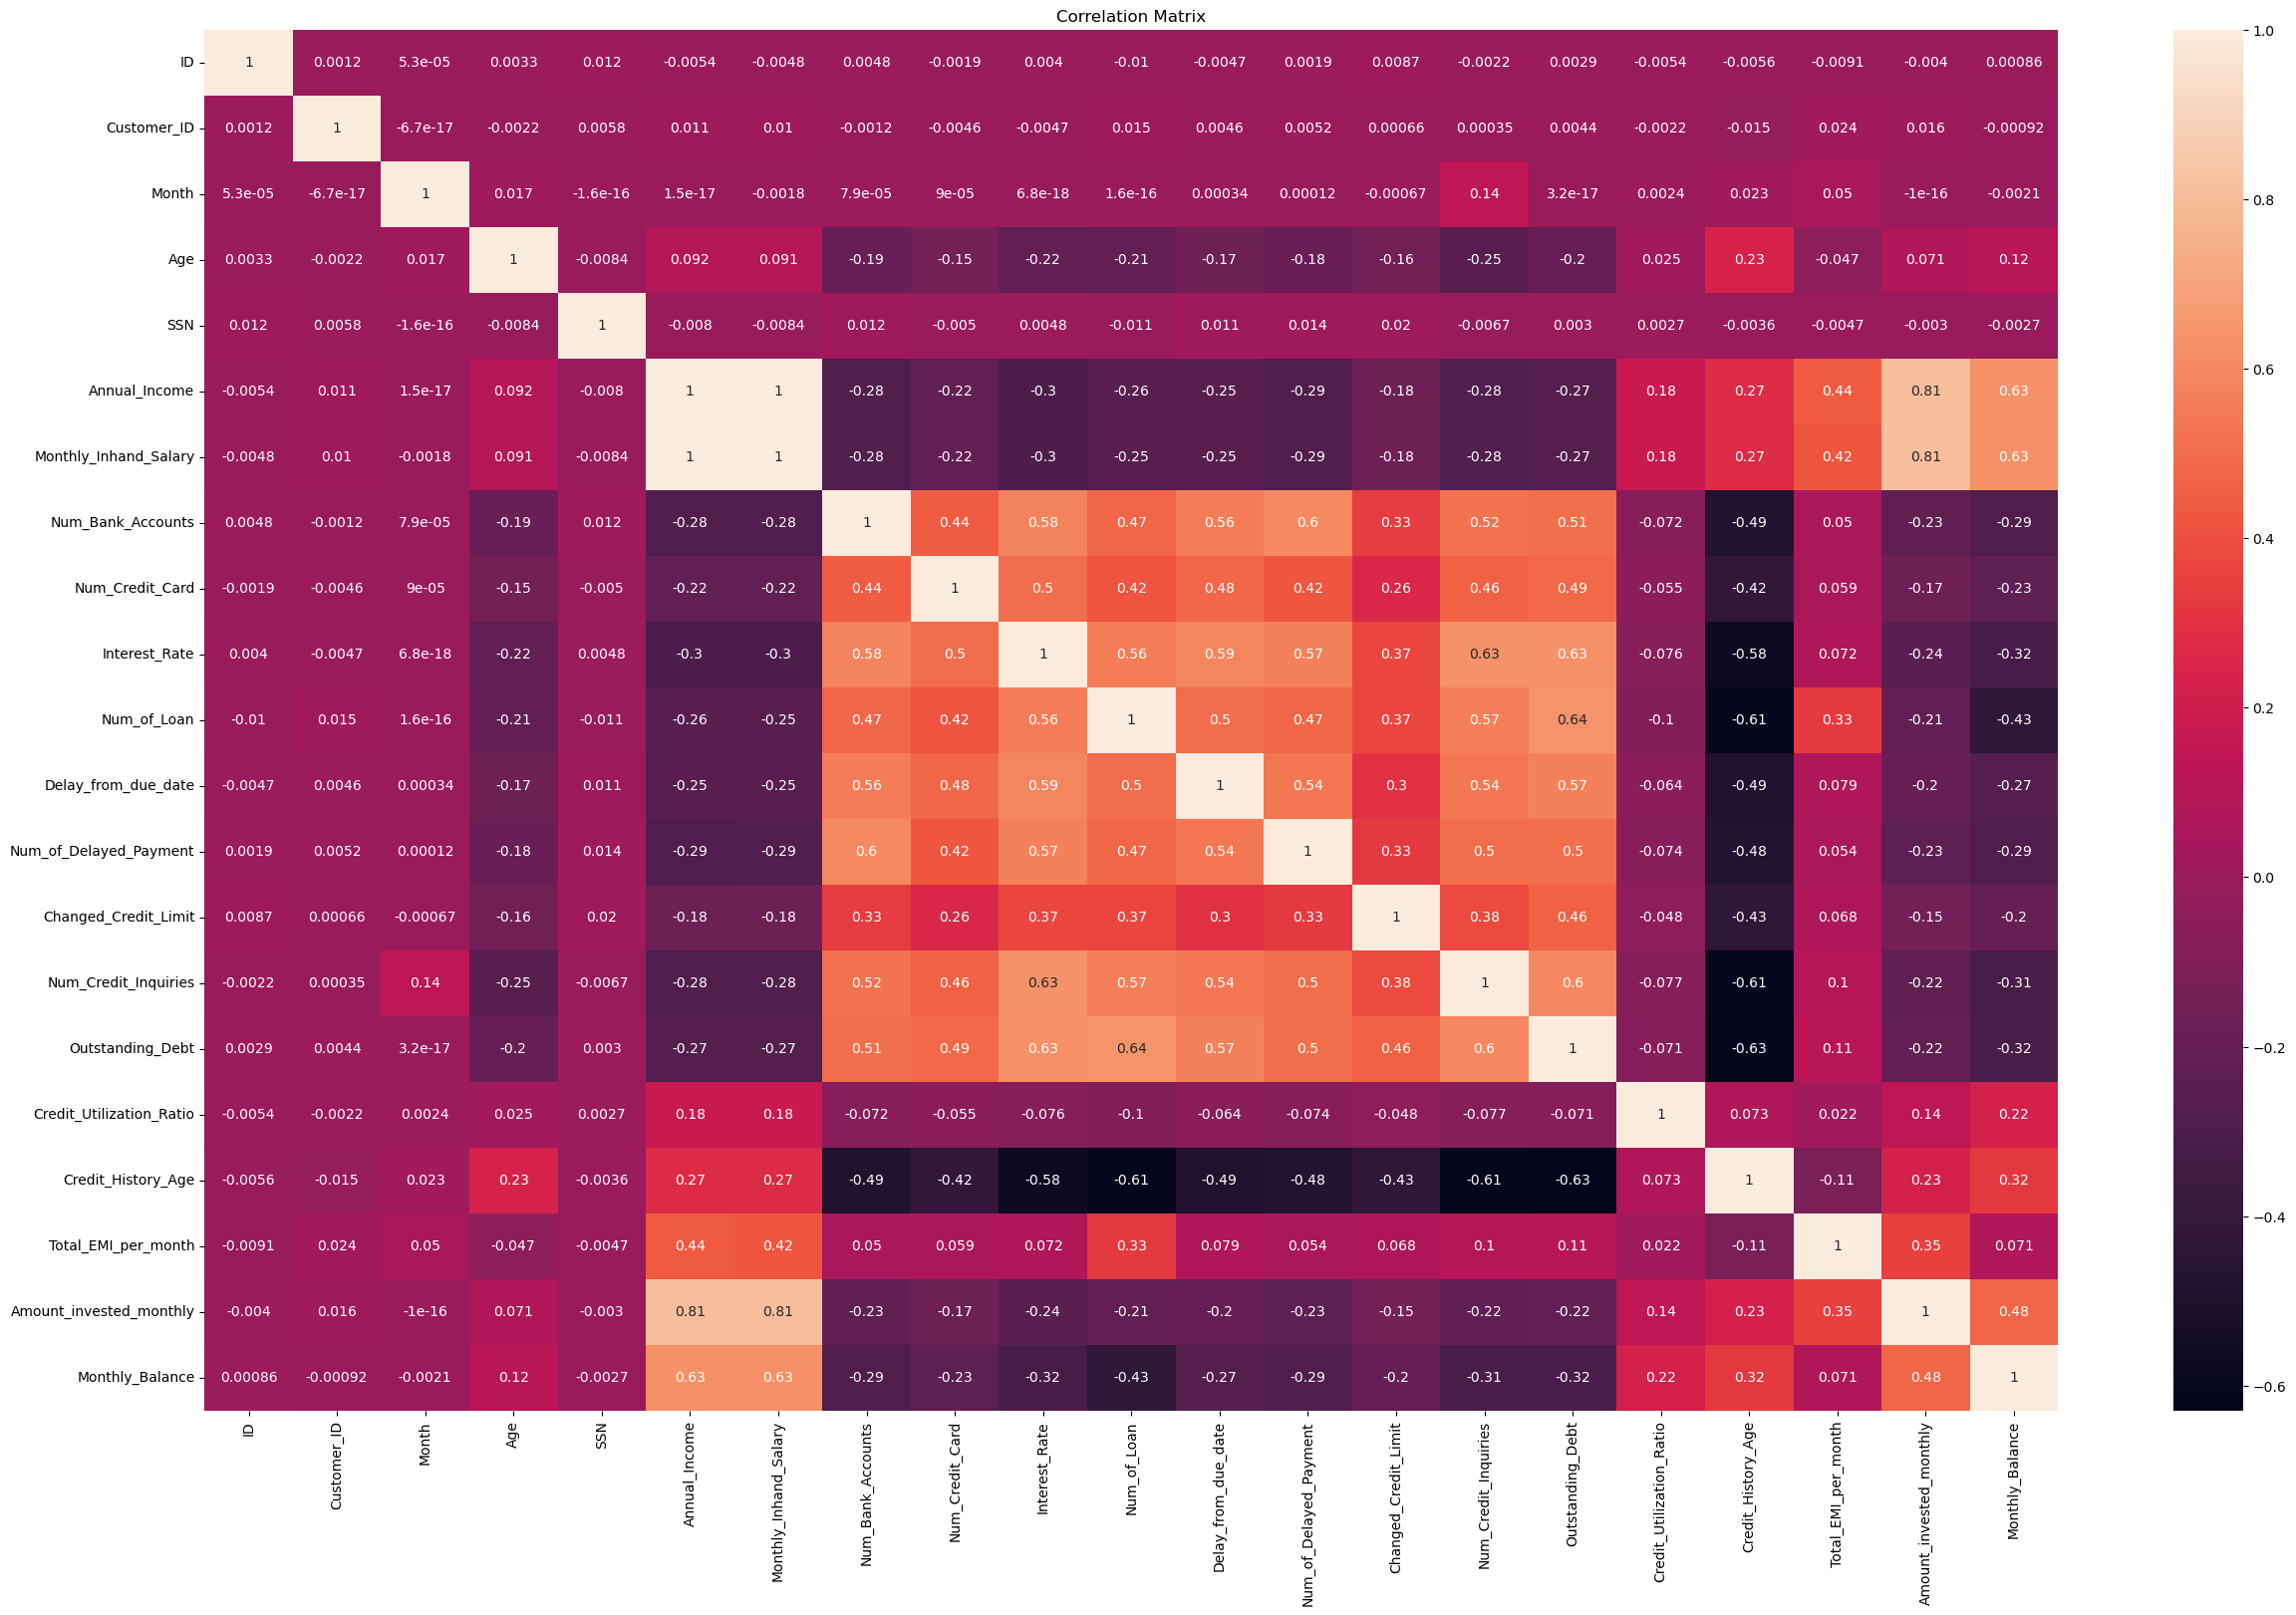

In [31]:
#correlation
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

Annual income and Monthly inhand salary, both have  perfect positive correlation.

Outstanding Debt and Credit History Age, they both are negatively correlated.


In [32]:
#checking to see the highly correlated feature
def correlation(dataset,threshold):
  column_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i,j]>threshold:
        colname = corr_matrix.columns[i]
        column_corr.add(colname)
  return column_corr

In [33]:
corr_features = correlation(df,0.90)
len(set(corr_features))
corr_features

{'Monthly_Inhand_Salary'}

In [34]:
df['Type_of_Loan'].value_counts().head(10)

No Data                    11408
Not Specified               1408
Credit-Builder Loan         1280
Personal Loan               1272
Debt Consolidation Loan     1264
Student Loan                1240
Payday Loan                 1200
Mortgage Loan               1176
Auto Loan                   1152
Home Equity Loan            1136
Name: Type_of_Loan, dtype: int64

In [35]:
## Removing Type of loans Columns , it doesnot contribute to credit score 
## removing Monthly_InHandsalary - it shows high correlation 
df.drop(['ID','Name','SSN','Customer_ID','Type_of_Loan','Monthly_Inhand_Salary'],axis=1,inplace=True)

In [73]:
df.head(5)

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_level,Payment_value
0,1,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,...,809.98,26.822620,265.0,1,49.574949,21.46538,312.494089,0,0,1
1,2,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,...,809.98,31.944960,266.0,1,49.574949,21.46538,284.629162,0,1,0
2,3,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,...,809.98,28.609352,267.0,1,49.574949,21.46538,331.209863,0,1,2
3,4,23.0,12,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,...,809.98,31.377862,268.0,1,49.574949,21.46538,223.451310,0,1,1
4,5,23.0,12,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,...,809.98,24.797347,269.0,1,49.574949,21.46538,341.489231,0,0,2


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

In [37]:
#label encoding
from sklearn.preprocessing import LabelEncoder
cols = ["Occupation","Credit_Mix","Payment_of_Min_Amount","Spending_level","Payment_value","Credit_Score"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [98]:
df.shape


(100000, 23)

In [38]:
df

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_level,Payment_value
0,1,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,...,809.98,26.822620,265.0,1,49.574949,21.465380,312.494089,0,0,1
1,2,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,...,809.98,31.944960,266.0,1,49.574949,21.465380,284.629162,0,1,0
2,3,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,...,809.98,28.609352,267.0,1,49.574949,21.465380,331.209863,0,1,2
3,4,23.0,12,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,...,809.98,31.377862,268.0,1,49.574949,21.465380,223.451310,0,1,1
4,5,23.0,12,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,...,809.98,24.797347,269.0,1,49.574949,21.465380,341.489231,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,9,39628.99,4.0,6.0,7.0,2.0,23.0,7.0,...,502.38,34.663572,378.0,1,35.104023,24.028477,479.866228,1,0,0
99996,5,25.0,9,39628.99,4.0,6.0,7.0,2.0,18.0,7.0,...,502.38,40.565631,379.0,1,35.104023,24.028477,496.651610,1,0,2
99997,6,25.0,9,39628.99,4.0,6.0,7.0,2.0,27.0,6.0,...,502.38,41.255522,380.0,1,35.104023,24.028477,516.809083,1,0,0
99998,7,25.0,9,39628.99,4.0,6.0,7.0,2.0,20.0,6.0,...,502.38,33.638208,381.0,1,35.104023,24.028477,319.164979,2,1,0


In [100]:
#spliting into dependant and independant

x = df.drop('Credit_Score',axis=1)
y = df['Credit_Score']

In [101]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaler = sc.fit_transform(x)

# Model Training

In [82]:
#splitting dataset into train and test   train=20%

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.20,random_state=42)

In [83]:
#using class weights to handle class imbalance
from sklearn.utils import class_weight
# As the data is imbalanced, Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([1.86467147, 1.15320302, 0.62634566])

In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)


In [85]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

# Logistic regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
     

In [87]:
lr=LogisticRegression()
lr_model=lr.fit(x_train,y_train)

In [88]:
lr_pred=lr_model.predict(x_test)

In [89]:
print("The accuracy score of Logistic regression is" ,accuracy_score(y_test, lr_pred))

The accuracy score of Logistic regression is 0.64795


# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

In [51]:
metric_k

[0.7094,
 0.713,
 0.7107,
 0.71415,
 0.712,
 0.71615,
 0.71445,
 0.71305,
 0.71035,
 0.7091,
 0.7067,
 0.7061]

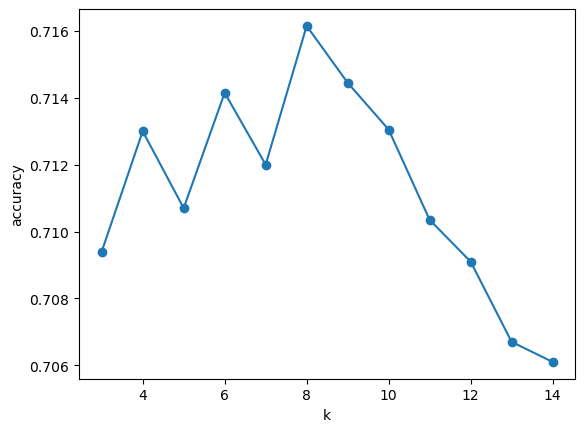

In [52]:
#plotting the graph to find the k value

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [53]:
#here lets take k as 8 as it gives the highest accuracy
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [54]:
print('Accuracy score of knn is : ',accuracy_score(y_test,y_pred_knn))

Accuracy score of knn is :  0.71615


In [55]:
x.head(20)

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Spending_level,Payment_value
0,1,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,...,1,809.98,26.822620,265.0,1,49.574949,21.465380,312.494089,0,1
1,2,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,...,1,809.98,31.944960,266.0,1,49.574949,21.465380,284.629162,1,0
2,3,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,...,1,809.98,28.609352,267.0,1,49.574949,21.465380,331.209863,1,2
3,4,23.0,12,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,...,1,809.98,31.377862,268.0,1,49.574949,21.465380,223.451310,1,1
4,5,23.0,12,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,...,1,809.98,24.797347,269.0,1,49.574949,21.465380,341.489231,0,2
5,6,23.0,12,19114.12,3.0,4.0,3.0,4.0,8.0,4.0,...,1,809.98,27.262259,270.0,1,49.574949,21.465380,340.479212,0,2
6,7,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,8.0,...,1,809.98,22.537593,271.0,1,49.574949,21.465380,244.565317,1,1
7,8,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,6.0,...,1,809.98,23.933795,272.0,1,49.574949,21.465380,358.124168,0,2
8,1,28.0,13,34847.84,2.0,4.0,6.0,1.0,3.0,4.0,...,1,605.03,24.464031,319.0,1,18.816215,39.684018,470.690627,1,1
9,2,28.0,13,34847.84,2.0,4.0,6.0,1.0,7.0,1.0,...,1,605.03,38.550848,320.0,1,18.816215,39.684018,484.591214,0,0


# SVM

In [56]:
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm1 = svm_cls.predict(x_test)

In [57]:
print('Accuracy score of svm is : ',accuracy_score(y_test,y_pred_svm1))

Accuracy score of svm is :  0.6357


# Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_model=dt_cls.fit(x_train,y_train)

In [59]:
y_pred_dt=dt_model.predict(x_test)

In [60]:
print('Accuracy score of Decision tree classifier is : ',accuracy_score(y_test, y_pred_dt))

Accuracy score of Decision tree classifier is :  0.73855


# Random Forest 

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf_cls= RandomForestClassifier()
best_rf_model = rf_cls.fit(x_train, y_train)
y_pred_rf=best_rf_model.predict(x_test)

In [92]:
print('Accuracy score of Random Forest classifier is : ',accuracy_score(y_test, y_pred_rf))

Accuracy score of Random Forest classifier is :  0.83295


In [93]:
print(' Accuracy Scores \n ')
print('Logistic regression: ',(accuracy_score(y_test,lr_pred)))
print('knn: ',(accuracy_score(y_test,y_pred_knn)))
print('svm: ',(accuracy_score(y_test,y_pred_svm1)))
print('Decision tree classifier: ',(accuracy_score(y_test,y_pred_dt)))
print('Random Forest Classifier: ',(accuracy_score(y_test,y_pred_rf)))


 Accuracy Scores 
 
Logistic regression:  0.64795
knn:  0.71615
svm:  0.6357
Decision tree classifier:  0.73855
Random Forest Classifier:  0.83295


from the above five algorithm i used random forest classifier has the higest accuracy out of all others.
so going with random forest classifier model

In [96]:
import pickle

In [97]:
pickle.dump(best_rf_model,open('best_rf_model.pkl','wb'))